<a href="https://colab.research.google.com/github/vdslab/biclique-bundling/blob/main/python/FCLD_test_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 時間
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# xlsxファイルを開く
file_path = "/content/drive/MyDrive/user_test/codes/FCLDユーザーテスト（回答） (2).xlsx"
workbook = openpyxl.load_workbook(file_path)

# 操作するシートを選択
sheet = workbook.active  # 最初のシートを選択する場合

# 特定の列を配列に格納（例: A列）
#CLD:S
#FCLD1: AJ
#FCLD2:BA
# FCLD3:BR
# FCLD4:CI
column_letters = [('S',' CLD'), ('AJ', 'FCLD1'), ('BA', 'FCLD2'), ('BR', 'FCLD3'),  ('CI', 'FCLD4')]
column_letter = 'A'  # 列名（例: 'A', 'B', 'C', ...）

data = {}

for column_letter in column_letters:
  row =  [cell.value for cell in sheet[column_letter[0]] if cell.value is not None]
  row = row[2:]

  trimmed_row = [ ]
  for r in row:
    if isinstance(r, str):
      trimmed_row.append(int(r[0:-1]))
    else:
      trimmed_row.append(int(r))

  data[column_letter[1]] = trimmed_row

# 結果を表示
print(data)

df = pd.DataFrame(data)


# 箱ひげ図を描画
plt.figure(figsize=(8, 6))  # 図のサイズを調整
df.plot(kind='box', vert=False, patch_artist = False) # 垂直方向に配置
plt.title('task time') # タイトルを設定
plt.xlabel('seconds')  # x軸のラベルを設定
plt.ylabel('layouts') # y軸のラベルを設定
plt.grid(axis='x', linestyle='--', alpha=0.7) # グリッド線を表示
plt.savefig("task_time01.png")
plt.show()

ValueError: invalid literal for int() with base 10: '18分32'

     CLD  FCLD1 param=0.9  FCLD2 param=0.8  FCLD3 param=0.7  FCLD4 param=0.6
0    7.0              4.0              6.0              7.0              9.0
1    9.0              9.0              8.0              8.0              8.0
2    7.0              6.0              8.0              9.0              9.0
3    6.0              3.0              7.0              7.0              6.0
4   10.0              6.0              5.0              3.0              3.0
5    8.0              7.0              9.0             10.0             10.0
6    8.0              7.0              8.0              7.0              5.0
7    8.0              8.0              9.0             10.0             10.0
8    8.0              7.0              6.0              7.0              7.0
9   10.0              8.0              8.0              8.0              9.0
10   1.0             10.0             10.0              1.0             10.0


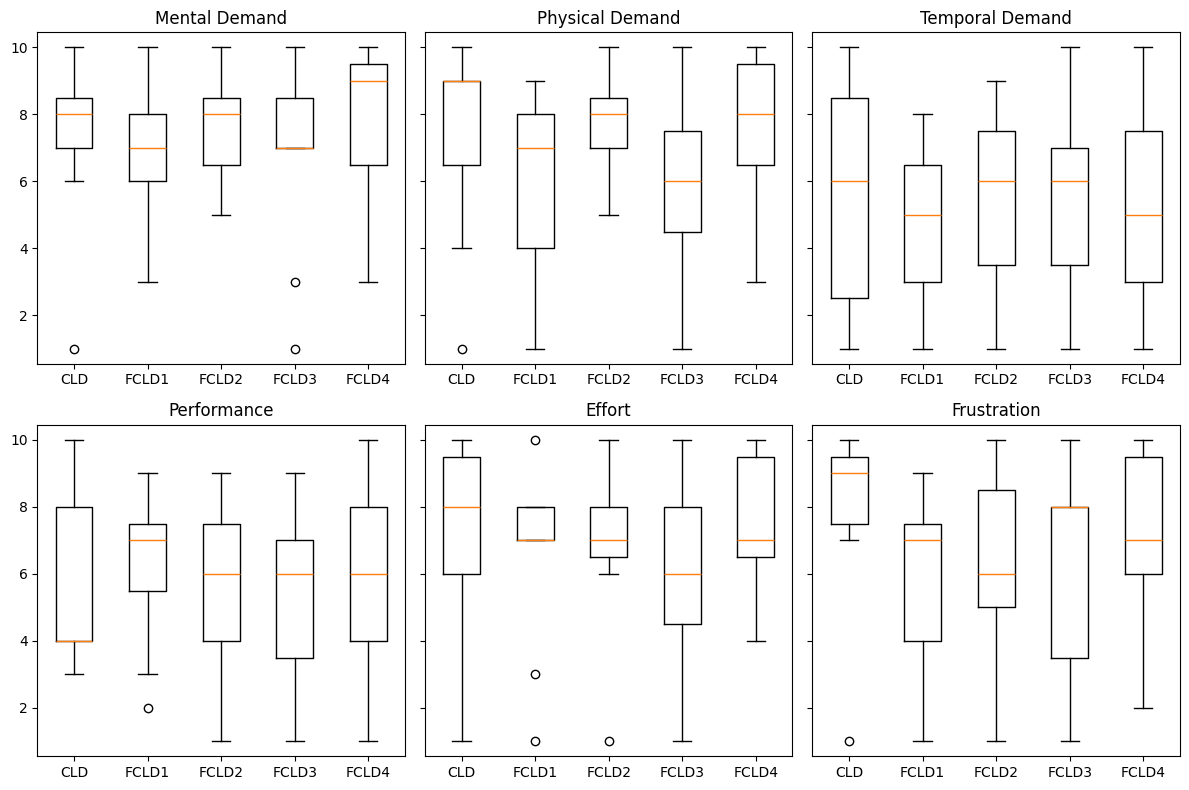

In [ ]:
# NASA TLX
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# xlsxファイルを開く
file_path = "/content/drive/MyDrive/user_test/codes/FCLDユーザーテスト（回答） (2).xlsx"
workbook = openpyxl.load_workbook(file_path)

# 操作するシートを選択
sheet = workbook.active  # 最初のシートを選択する場合

# 知的要求
#CLD:T
#FCLD1: AK
#FCLD2:BB
# FCLD3:BS
# FCLD4:CJ
column_letters = {
    "Mental Demand": [('T',' CLD'), ('AK', 'FCLD1 param=0.9'), ('BB', 'FCLD2 param=0.8'), ('BS', 'FCLD3 param=0.7'),  ('CJ', 'FCLD4 param=0.6')],
    "Physical Demand": [('U',' CLD'), ('AL', 'FCLD1 param=0.9'), ('BC', 'FCLD2 param=0.8'), ('BT', 'FCLD3 param=0.7'),  ('CK', 'FCLD4 param=0.6')],
    "Temporal Demand":[('V',' CLD'), ('AM', 'FCLD1 param=0.9'), ('BD', 'FCLD2 param=0.8'), ('BU', 'FCLD3 param=0.7'),  ('CL', 'FCLD4 param=0.6')],
    "Performance":[('W',' CLD'), ('AN', 'FCLD1 param=0.9'), ('BE', 'FCLD2 param=0.8'), ('BV', 'FCLD3 param=0.7'),  ('CM', 'FCLD4 param=0.6')],
    "Effort":[('X',' CLD'), ('AO', 'FCLD1 param=0.9'), ('BF', 'FCLD2 param=0.8'), ('BW', 'FCLD3 param=0.7'),  ('CN', 'FCLD4 param=0.6')],
    "Frustration":[('Y',' CLD'), ('AP', 'FCLD1 param=0.9'), ('BG', 'FCLD2 param=0.8'), ('BX', 'FCLD3 param=0.7'),  ('CO', 'FCLD4 param=0.6')],
}

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

dfs = {}
for index in column_letters:
  data = {}
  for column_letter in column_letters[index]:
    row =  [cell.value for cell in sheet[column_letter[0]] if cell.value is not None]
    data[column_letter[1]] = row[2:]
  dfs[index] = pd.DataFrame(data)

  #plt.figure(figsize=(4, 3))  # 図のサイズを調整
  #dfs[index].plot(kind='box', vert=False, patch_artist = True) # 垂直方向に配置
  #plt.title(index) # タイトルを設定
  #plt.ylabel('layouts') # y軸のラベルを設定
  #plt.grid(axis='x', linestyle='--', alpha=0.7) # グリッド線を表示

print(dfs[ "Mental Demand"])
plot_labels=["CLD", "FCLD1", "FCLD2", "FCLD3", "FCLD4"]

axs[0, 0].boxplot(dfs[ "Mental Demand"], labels=plot_labels)
axs[0, 0].set_title("Mental Demand")

axs[0, 1].boxplot(dfs[ "Physical Demand"], labels=plot_labels)
axs[0, 1].set_title("Physical Demand")

axs[0, 2].boxplot(dfs[ "Temporal Demand"], labels=plot_labels)
axs[0, 2].set_title("Temporal Demand")

axs[1, 0].boxplot(dfs[ "Performance"], labels=plot_labels)
axs[1, 0].set_title("Performance")

axs[1, 1].boxplot(dfs[ "Effort"], labels=plot_labels)
axs[1, 1].set_title("Effort")

axs[1, 2].boxplot(dfs[ "Frustration"], labels=plot_labels)
axs[1, 2].set_title("Frustration")

plt.tight_layout()
plt.savefig("nasa_tlx01.png")
plt.show()

error CLD {"up":"[1,03,2,5,6,7,13]","down":"[5]"} southern_woman
error CLD {"up":"[6]" ,"down":"[11, 12, 0, 2, ,7, 3]"} mooc
error CLD {"up":"[14,19,15]","dowm:"[3,]"} mooc
error CLD {"up":"[14,12]","down":"[7,3} mooc
error FCLD1 {"up":"[10,12,11]","down":"[6:9,10]"} southern_woman
error FCLD1 {"up":"[10,12.11]","down":"[7,6,10]"} southern_woman
error FCLD1 {"up":"[2,1,5]" ,"down":"[15,22,14]"} ceo
error FCLD1 {"up":"[23, 15, 22, 24]","down":"[2 1, 5]"} ceo
error FCLD1 {"up":"[10,"down":"[2,0,3,16,15]"} leadership
error FCLD1 {"up":"[14]" ,"down":"[20, 21, 22]"} mooc
error FCLD1 {"up":"[1]","down""[11,12,0,10]"} mooc
error FCLD2 {"up":"[0,1,2,3,4,5,6]","down""[2,3,4,0]"} southern_woman
error FCLD2 {"up":"[0,2,12]","down""[2,3,4,0,5,8,1]"} southern_woman
error FCLD2 {"up":"[12,1,16,,24,25]"} ceo
error FCLD2 {"up":"[3,11]","down""[9,4]"} leadership
error FCLD2 {"up":"[14,16]","down""[1922,21,20]"} leadership
error FCLD2 {"up":"[0, 1]" ,"down":"[1, 10, , 0, 7, 9]"} mooc
error FCLD2 {"up":

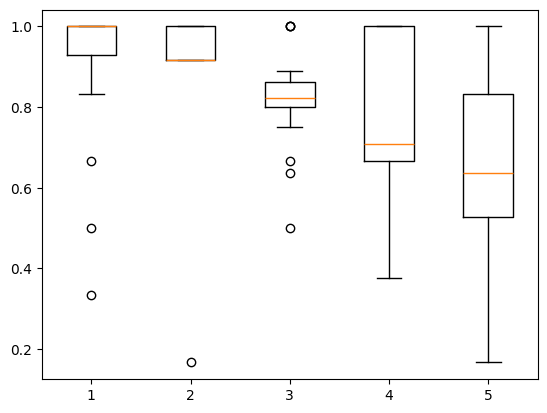

In [ ]:
from ctypes import c_int32
import json
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

def calc_density(data,  jd):
  cnt = 0
  no = 0
  up =  ast.literal_eval( jd['up'])
  down =  ast.literal_eval( jd['down'])
  for u in up:
    for d in down:
      if data[u][d] == 1:
        cnt += 1
      else:
        no += 1
  return cnt / (len(up) * len(down) )

def convert_to_json(input_string):
  data = ''
  for i in input_string:
    if(i == 'u'):
      data += '"'
      data += i
    elif(i == 'p'):
      data +=  i
      data += '"'
    elif(i == 'd'):
      data += ','
      data += '"'
      data += i
    elif(i == 'n'):
      data +=  i
      data += '"'
    elif(i == '['):
      data += '"'
      data += i
    elif(i == ']'):
      data += i
      data += '"'
    else:
      data += i
  data =  '{' + data + '}'
  return data.replace('\n', '')

# xlsxファイルを開く
file_path = "/content/drive/MyDrive/user_test/codes/FCLDユーザーテスト（回答） (2).xlsx"
workbook = openpyxl.load_workbook(file_path)

# 操作するシートを選択
sheet = workbook.active  # 最初のシートを選択する場合

# column_letters = {
#    "southern woman": [('CLD', 'I', 'J'),   ('FCLD1', 'Z', 'AA'), ('FCLD2', 'AQ', 'AR'), ('FCLD3', 'BH', 'BI'), ('FCLD4', 'BY', 'BZ') ],
#    "CEO":[('CLD', 'K', 'L'),   ('FCLD1', 'AB', 'AC'), ('FCLD2', 'AS', 'AT'), ('FCLD3', 'BJ', 'BK'), ('FCLD4', 'CA', 'CB') ],
#    "leadership": [('CLD', 'M', 'N'),   ('FCLD1', 'AD', 'AE'), ('FCLD2', 'AU', 'AV'), ('FCLD3', 'BL', 'BM'), ('FCLD4', 'CC', 'CD') ],
#    "mooc": [('CLD', 'O', 'P'),   ('FCLD1', 'AF', 'AG'), ('FCLD2', 'AW', 'AX'), ('FCLD3', 'BN', 'BO'), ('FCLD4', 'CE', 'CF') ]
#}

column_letters = {
    "CLD": [('southern_woman', 'I', 'J'), ('ceo', 'K', 'L'), ('leadership', 'M', 'N'), ('mooc', 'O', 'P')  ],
    "FCLD1": [('southern_woman', 'Z', 'AA'),     ('ceo', 'AB', 'AC'), ('leadership', 'AD', 'AE'), ('mooc', 'AF', 'AG')],
    "FCLD2": [('southern_woman', 'AQ', 'AR'),  ('ceo', 'AS', 'AT'),  ('leadership', 'AU', 'AV'),  ('mooc', 'AW', 'AX')],
    "FCLD3": [ ('southern_woman', 'BH', 'BI'),  ('ceo', 'BJ', 'BK'),  ('leadership', 'BL', 'BM'),  ('mooc', 'BN', 'BO')],
    "FCLD4": [('southern_woman', 'BY', 'BZ') ,  ('ceo', 'CA', 'CB'),  ('leadership', 'CC', 'CD') , ('mooc', 'CE', 'CF')  ]
}


data = {}
md = []
for index in column_letters:
  for column_letter in column_letters[index]:
    col1 =  [cell.value for cell in sheet[column_letter[1]][2:] if cell.value is not None]
    col2 =  [cell.value for cell in sheet[column_letter[2]][2:] if cell.value is not None]
    merged_col = []
    dict_col = []


    for c1, c2 in  zip(col1, col2):
      merged_col.append( convert_to_json(c1))
      merged_col.append( convert_to_json(c2))
    for mc in merged_col:
      json_open = open(f'/content/{column_letter[0]}.json', 'r')
      bipartite = json.load(json_open)
      try:
        if  "up" not in mc:
          raise "up typo"

        if  "down" not in mc:
           raise "down typo"
        dict_mc = json.loads(mc)
        dict_col.append(calc_density(bipartite, dict_mc))
      except:
        print("error", index, mc, column_letter[0])
    data[index] = dict_col
  md.append(dict_col)
print(data)

# 箱ひげ図を描画
fig, ax = plt.subplots()
ax.boxplot(md)
plt.show()

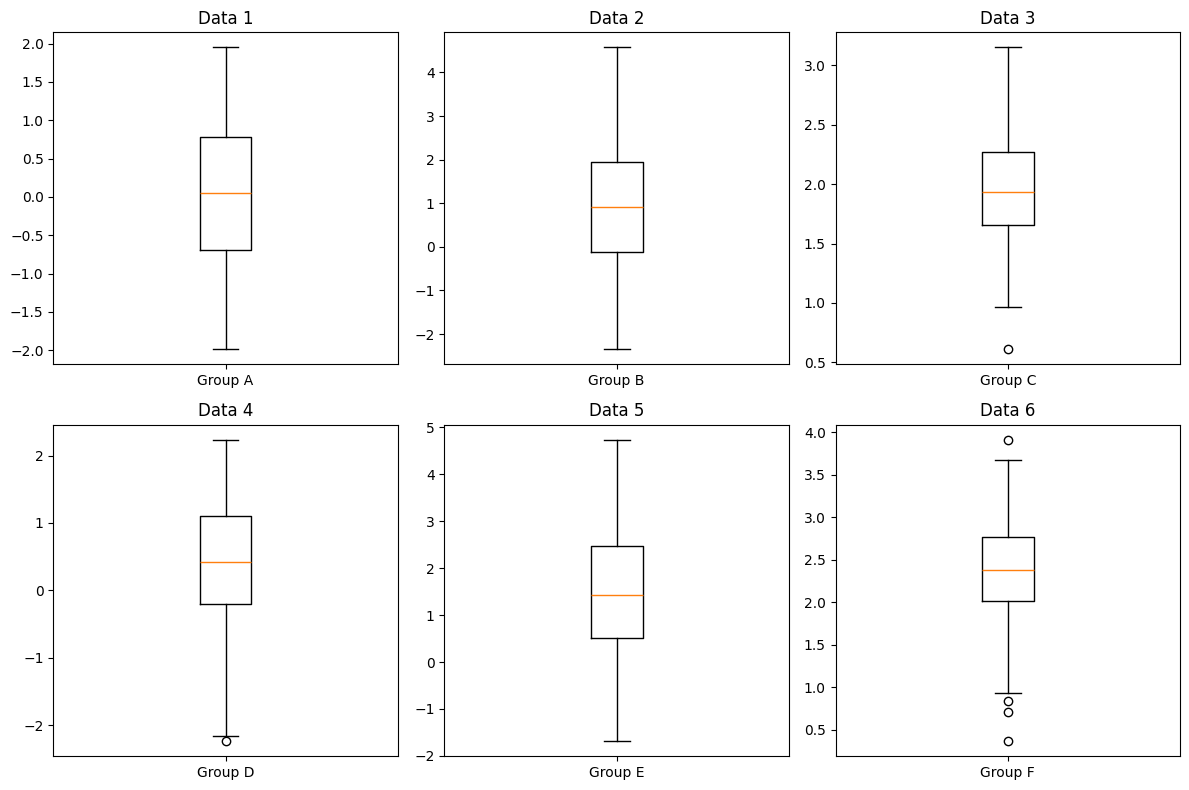

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# データを生成
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(1, 1.5, 100)
data3 = np.random.normal(2, 0.5, 100)
data4 = np.random.normal(0.5, 1, 100)
data5 = np.random.normal(1.5, 1.2, 100)
data6 = np.random.normal(2.5, 0.7, 100)

# 2行3列のサブプロットを作成
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# 各サブプロットに箱ひげ図を描画（ラベルを指定）
axs[0, 0].boxplot(data1, labels=["Group A"])
axs[0, 0].set_title("Data 1")

axs[0, 1].boxplot(data2, labels=["Group B"])
axs[0, 1].set_title("Data 2")

axs[0, 2].boxplot(data3, labels=["Group C"])
axs[0, 2].set_title("Data 3")

axs[1, 0].boxplot(data4, labels=["Group D"])
axs[1, 0].set_title("Data 4")

axs[1, 1].boxplot(data5, labels=["Group E"])
axs[1, 1].set_title("Data 5")

axs[1, 2].boxplot(data6, labels=["Group F"])
axs[1, 2].set_title("Data 6")

# レイアウトを調整
plt.tight_layout()

# プロットを表示
plt.show()
